# <div align="center">Capstone Project - Car accident's severity prediction</div>
## <div align="center">Applied Data Science Capstone by IBM/Coursera</div>
### <div align="center">Daniel Orozco Venegas</div>

## Introduction: Business Problem <a name="introduction"></a>

The **Seattle City population** in 2019 was **747,300** people and **had grown at a 22.78% rate since 2010**, at the same time, **81% of Seattle households owned at least one vehicle in 2019**. Furthermore, in 2019 Seattle City reported 9412 car accidents. Therefore, it is of great interest to reduce car accidents, and it can be achieved by making citizens aware of how likely they are to be implicated on a severe car accident. However, predicting car accidents and their severity is not a task humans can accomplish when thousands of cars, pedestrians and pedalcyclists are involved in the prediction.

In this project we will try to predict **car accident's severity in Seattle City**. Specifically, this report will be targeted to **any kind of government or public health organization** interested in reducing car accidents and the health or economical consequences they have.

Based on definition of our problem, factors that will influence our decission are:
* number of people involved in the car accident (any type of pedestrian)
* road condition at the time and place of the car accident
* light condition at the time and place of the car accident
* weather at the time and place of the car accident
* if anyone involved in the car accident was under drug influence

Following data source will be needed to extract the required information:
* [Kaggle Seattle City car accidents dataset](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data).

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Click here and press Shift+Enter
!wget -O seattle_car_accidents.csv http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-10-14 15:50:19--  http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)... 52.55.102.109, 52.204.125.210, 52.22.25.232, ...
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|52.55.102.109|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv [following]
--2020-10-14 15:50:19--  https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|52.55.102.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘seattle_car_accidents.csv’

    [     <=>                               ] 85,042,856  91

In [57]:
seattle_car_accid_df = pd.read_csv("seattle_car_accidents.csv")
seattle_car_accid_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


#### Dataset dimensions

In [5]:
seattle_car_accid_df.shape

(221738, 40)

The dataset has 221,738 rows and 40 columns

#### Confirming how many years of data we have

In [6]:
seattle_car_accid_df['INCDTTM'] = pd.to_datetime(seattle_car_accid_df['INCDTTM'])

In [7]:
seattle_car_accid_df['INCDTTM'].dt.year.value_counts().sort_index()

2003        1
2004    15457
2005    16016
2006    15794
2007    15082
2008    14139
2009    13275
2010    11958
2011    12416
2012    12732
2013    12757
2014    13212
2015    14260
2016    13955
2017    12477
2018    12198
2019    11204
2020     4805
Name: INCDTTM, dtype: int64

#### Checking which columns have null values and how many they are

In [8]:
missing_data = seattle_car_accid_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

X
False    214260
True       7478
Name: X, dtype: int64

Y
False    214260
True       7478
Name: Y, dtype: int64

OBJECTID
False    221738
Name: OBJECTID, dtype: int64

INCKEY
False    221738
Name: INCKEY, dtype: int64

COLDETKEY
False    221738
Name: COLDETKEY, dtype: int64

REPORTNO
False    221738
Name: REPORTNO, dtype: int64

STATUS
False    221738
Name: STATUS, dtype: int64

ADDRTYPE
False    218024
True       3714
Name: ADDRTYPE, dtype: int64

INTKEY
True     149711
False     72027
Name: INTKEY, dtype: int64

LOCATION
False    217145
True       4593
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     120403
False    101335
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     209953
False     11785
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    221737
True          1
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    221738
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    195287
True      26451
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    22

There are several columns with many null values, but the only one considered important for the prediction (because the other columns are columns used like keys for other datasets) is the SPEEDING column, for which 95% of its values are null.

#### Selecting the meaningful columns/features for the prediction

In [58]:
seattle_car_accid_df = seattle_car_accid_df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','HITPARKEDCAR','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']]
seattle_car_accid_df.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,2,0,0,2,N,Intersection,Angles,At Intersection (intersection related),N,Clear,Dry,Daylight,1
1,2,0,0,2,N,Block,Rear Ended,Mid-Block (not related to intersection),0,Raining,Wet,Dusk,1
2,2,0,0,2,N,Block,Head On,Mid-Block (not related to intersection),N,Clear,Dry,Dark - Street Lights On,2
3,3,1,0,1,N,Intersection,Pedestrian,At Intersection (intersection related),N,Raining,Wet,Dark - Street Lights On,2
4,2,0,0,1,N,Block,Other,Mid-Block (not related to intersection),0,Clear,Ice,Dark - Street Lights On,2


#### Standardizing variables

In [10]:
seattle_car_accid_df.groupby('UNDERINFL').count()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
UNDERINFL,,,,,,,,,,,,
0,81676,81676,81676,81676,81676,81006,81676,80342,81666,81660,81664,81676
1,4230,4230,4230,4230,4230,4226,4230,4212,4230,4230,4230,4230
N,104002,104002,104002,104002,104002,102878,103981,99207,103814,103889,103727,104001
Y,5399,5399,5399,5399,5399,5372,5398,5315,5386,5398,5386,5399


In [59]:
seattle_car_accid_df['UNDERINFL'].replace(['0','1'],['N','Y'], inplace=True)
seattle_car_accid_df['UNDERINFL'].value_counts()

N    185678
Y      9629
Name: UNDERINFL, dtype: int64

In [12]:
seattle_car_accid_df.groupby('HITPARKEDCAR').count()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
HITPARKEDCAR,,,,,,,,,,,,
N,209649,209649,209649,209649,206242,188059,200703,188077,187906,187981,187829,209648
Y,12089,12089,12089,12089,11782,7228,9056,7230,7191,7197,7179,12089


#### Checking if any of the severities has most of it's values as null

In [19]:
seattle_car_accid_df['SEVERITYCODE'].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [20]:
nan_temp_df = seattle_car_accid_df
nan_temp_df.dropna(inplace=True)
print(nan_temp_df.shape)
nan_temp_df['SEVERITYCODE'].value_counts()

(188328, 13)


1     127603
2      57354
2b      3032
3        338
0          1
Name: SEVERITYCODE, dtype: int64

There is only 1 car accident that ended with an unknown severity and from which there is enough data for the prediction. Therefore, we will remove the unknown severity from the prediction.

In [60]:
seattle_car_accid_df.dropna(inplace=True)
print(seattle_car_accid_df.shape)
seattle_car_accid_df['SEVERITYCODE'].value_counts()

(188328, 13)


1     127603
2      57354
2b      3032
3        338
0          1
Name: SEVERITYCODE, dtype: int64

In [61]:
seattle_car_accid_df.drop(seattle_car_accid_df[seattle_car_accid_df['SEVERITYCODE'] == '0'].index, inplace=True)
print(seattle_car_accid_df.shape)
seattle_car_accid_df['SEVERITYCODE'].value_counts()

(188327, 13)


1     127603
2      57354
2b      3032
3        338
Name: SEVERITYCODE, dtype: int64

#### Finding out outliers for the number of people and vehicles involved on car accidents

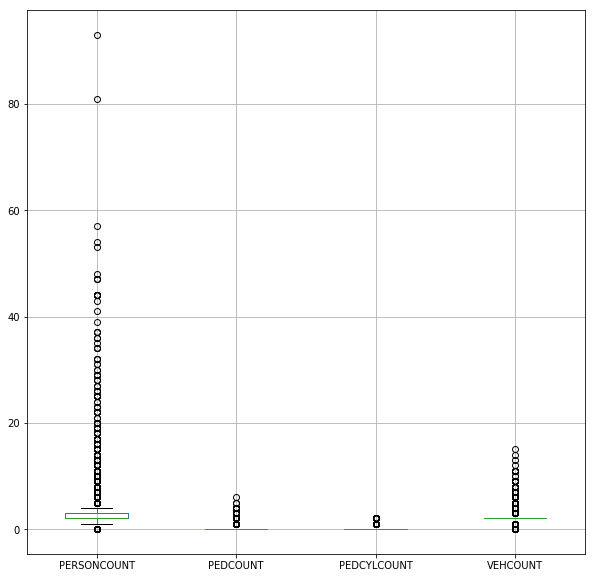

In [24]:
seattle_car_accid_df.boxplot(column=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'], figsize=(10,10))

In [25]:
print("The min PERSONCOUNT is:",min(seattle_car_accid_df['PERSONCOUNT']))
print("The max PERSONCOUNT is:",max(seattle_car_accid_df['PERSONCOUNT']))

The min PERSONCOUNT is: 0
The max PERSONCOUNT is: 93


There are a couple of outliers for the PERSONCOUNT column which we should remove to avoid them from biasing our prediction.

In [62]:
seattle_car_accid_df.drop(seattle_car_accid_df[seattle_car_accid_df['PERSONCOUNT'] == 93].index,inplace=True)
seattle_car_accid_df.drop(seattle_car_accid_df[seattle_car_accid_df['PERSONCOUNT'] == 81].index,inplace=True)

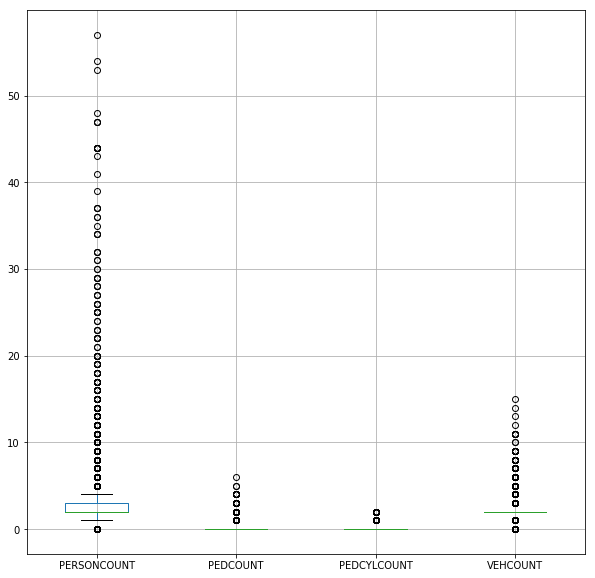

In [27]:
seattle_car_accid_df.boxplot(column=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'], figsize=(10,10))

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


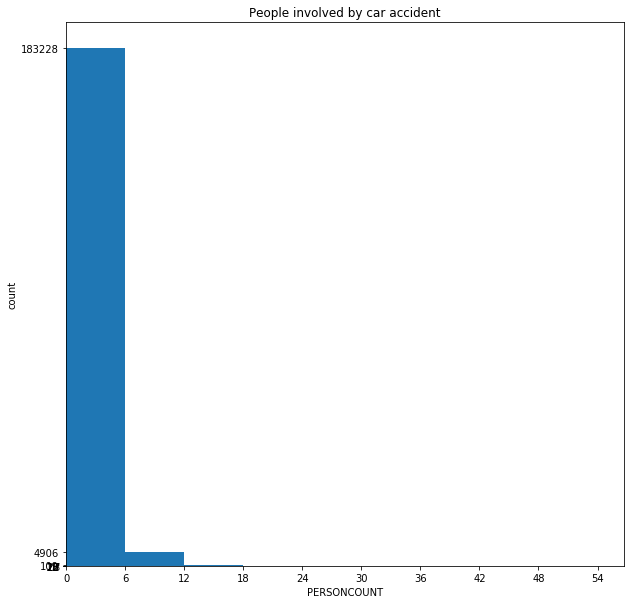

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
data = seattle_car_accid_df['PERSONCOUNT']

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data, bins=np.arange(0,60,6))

plt.figure(figsize=(10,10))
plt.hist(data, bins=bin_edges)

plt.xticks(bin_edges)
plt.yticks(count)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

# set x/y labels and plot title
plt.xlabel("PERSONCOUNT")
plt.ylabel("count")
plt.title("People involved by car accident")
plt.show()

In [56]:
seattle_car_accid_df['ROADCOND'].value_counts()

1    126237
2     47957
4     11577
3      1200
5       987
6       127
7       111
8        69
9        60
Name: ROADCOND, dtype: int64

Most of the car accidents have less than 6 people involved.

#### Mapping the categorical variables to numeric variables to correlate and use for the random forest classifier

In [63]:
df = seattle_car_accid_df.copy()

In [64]:
df['HITPARKEDCAR'].replace(['N','Y'],[0,1],inplace=True)

In [32]:
df['ADDRTYPE'].value_counts()

Block           122314
Intersection     65772
Alley              239
Name: ADDRTYPE, dtype: int64

In [65]:
df['ADDRTYPE'].replace(['Block','Intersection','Alley'],[1,2,3],inplace=True)

In [34]:
df['COLLISIONTYPE'].value_counts()

Parked Car    43665
Angles        35362
Rear Ended    34254
Other         23833
Sideswipe     18573
Left Turn     14050
Pedestrian     7563
Cycles         5877
Right Turn     2990
Head On        2158
Name: COLLISIONTYPE, dtype: int64

In [66]:
df['COLLISIONTYPE'].replace(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'],[1,2,3,4,5,6,7,8,9,10],inplace=True)

In [36]:
df['COLLISIONTYPE'].value_counts()

1     43665
2     35362
3     34254
4     23833
5     18573
6     14050
7      7563
8      5877
9      2990
10     2158
Name: COLLISIONTYPE, dtype: int64

In [40]:
df['JUNCTIONTYPE'].value_counts()

1    89049
2    63649
3    22651
4    10722
5     2084
6      165
7        5
Name: JUNCTIONTYPE, dtype: int64

In [67]:
df['JUNCTIONTYPE'].replace(['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction','Unknown'],[1,2,3,4,5,6,7],inplace=True)

In [39]:
df['WEATHER'].value_counts()

Clear                       112681
Raining                      33525
Overcast                     28013
Unknown                      11676
Snowing                        893
Other                          773
Fog/Smog/Smoke                 564
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64

In [68]:
df['WEATHER'].replace(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],[1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [42]:
df['ROADCOND'].value_counts()

Dry               126237
Wet                47957
Unknown            11577
Ice                 1200
Snow/Slush           987
Other                127
Standing Water       111
Sand/Mud/Dirt         69
Oil                   60
Name: ROADCOND, dtype: int64

In [69]:
df['ROADCOND'].replace(['Dry','Wet','Ice','Unknown','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'],[1,2,3,4,5,6,7,8,9],inplace=True)

In [44]:
df['LIGHTCOND'].value_counts()

Daylight                    117212
Dark - Street Lights On      49155
Unknown                      10504
Dusk                          5952
Dawn                          2559
Dark - No Street Lights       1504
Dark - Street Lights Off      1197
Other                          218
Dark - Unknown Lighting         24
Name: LIGHTCOND, dtype: int64

In [70]:
df['LIGHTCOND'].replace(['Daylight','Dark - Street Lights On','Dusk','Unknown','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'],[1,2,3,4,5,6,7,8,9],inplace=True)

In [71]:
df['UNDERINFL'].replace(['N','Y'],[0,1],inplace=True)

In [72]:
df['SEVERITYCODE'].replace(['0','1','2','2b','3'],[0,1,2,3,4],inplace=True)
df['SEVERITYCODE'].value_counts()

1    127603
2     57353
3      3032
4       337
Name: SEVERITYCODE, dtype: int64

In [78]:
seattle_car_accid_df['SEVERITYCODE'].replace(['0','1','2','2b','3'],[0,1,2,3,4],inplace=True)
seattle_car_accid_df['SEVERITYCODE'].value_counts()

1    127603
2     57353
3      3032
4       337
Name: SEVERITYCODE, dtype: int64

In [96]:
df.dtypes
df.corr()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
PERSONCOUNT,1.000000,-0.023422,-0.043483,0.406572,-0.044949,0.055082,0.000969,0.055227,0.021760,-0.054666,-0.068121,-0.062013,0.115289
PEDCOUNT,-0.023422,1.000000,-0.021303,-0.325343,-0.035285,0.145761,0.325533,0.015546,0.025496,-0.015006,-0.018846,-0.002419,0.285551
PEDCYLCOUNT,-0.043483,-0.021303,1.000000,-0.309623,-0.028604,0.084964,0.378072,0.036480,-0.018767,-0.043252,-0.049452,-0.033182,0.217548
VEHCOUNT,0.406572,-0.325343,-0.309623,1.000000,0.075272,-0.097278,-0.339986,-0.021226,-0.013725,-0.007682,-0.016075,-0.027237,-0.111259
HITPARKEDCAR,-0.044949,-0.035285,-0.028604,0.075272,1.000000,-0.121963,-0.186468,-0.113687,0.015424,0.037139,0.047121,0.065598,-0.092017
ADDRTYPE,0.055082,0.145761,0.084964,-0.097278,-0.121963,1.000000,0.211885,0.229568,-0.046456,-0.071938,-0.094802,-0.086589,0.184902
COLLISIONTYPE,0.000969,0.325533,0.378072,-0.339986,-0.186468,0.211885,1.000000,0.135252,-0.004981,-0.102726,-0.127637,-0.122297,0.272115
JUNCTIONTYPE,0.055227,0.015546,0.036480,-0.021226,-0.113687,0.229568,0.135252,1.000000,-0.036855,-0.054438,-0.082921,-0.099163,0.086505
UNDERINFL,0.021760,0.025496,-0.018767,-0.013725,0.015424,-0.046456,-0.004981,-0.036855,1.000000,-0.033215,-0.039374,0.075536,0.063877
WEATHER,-0.054666,-0.015006,-0.043252,-0.007682,0.037139,-0.071938,-0.102726,-0.054438,-0.033215,1.000000,0.639292,0.293811,-0.087047


The correlation matrix confirms some of the widely accepted relationships except for the belief that drugs have a high impact on car accident's severity, which the correlation matrix denies.

### Data exploration

In [76]:
import seaborn as sns

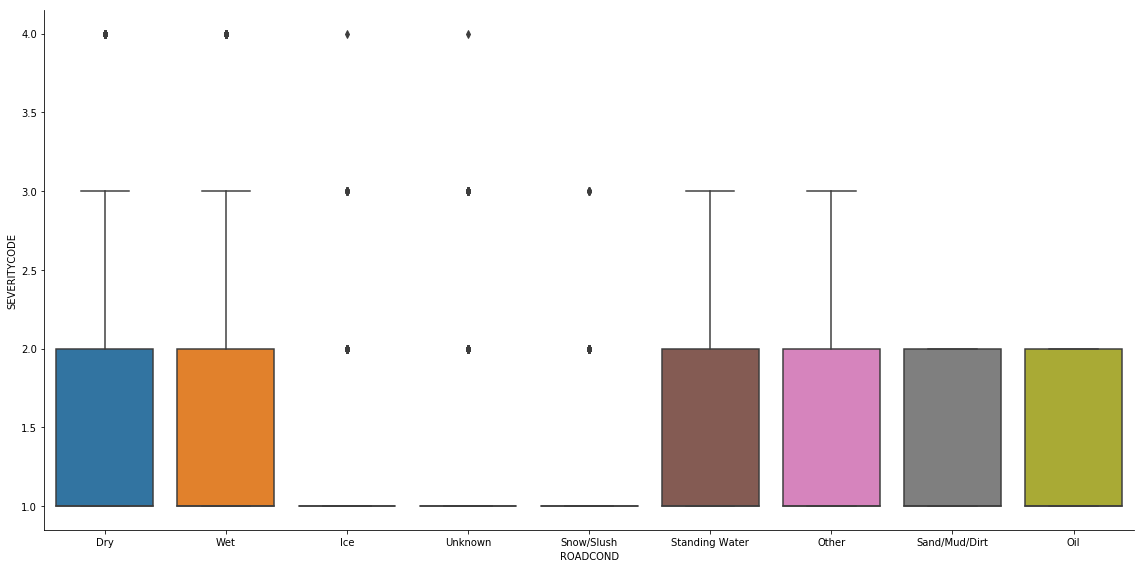

In [79]:
sns.catplot(x="ROADCOND", y="SEVERITYCODE", kind="box", data=seattle_car_accid_df, height=8, aspect=2)

We will calculate the percents for the relationship between road condition and severity

In [80]:
total_rows = len(seattle_car_accid_df.index)

In [83]:
roadcond_count = seattle_car_accid_df[['ROADCOND']].rename(columns={'ROADCOND':'Road condition'})
roadcond_count = roadcond_count.groupby(['Road condition']).size().reset_index().rename(columns={0:'Car accidents'})
roadcond_count['Percentage'] = roadcond_count['Car accidents'].apply(lambda x: round(100 * x / total_rows,2))

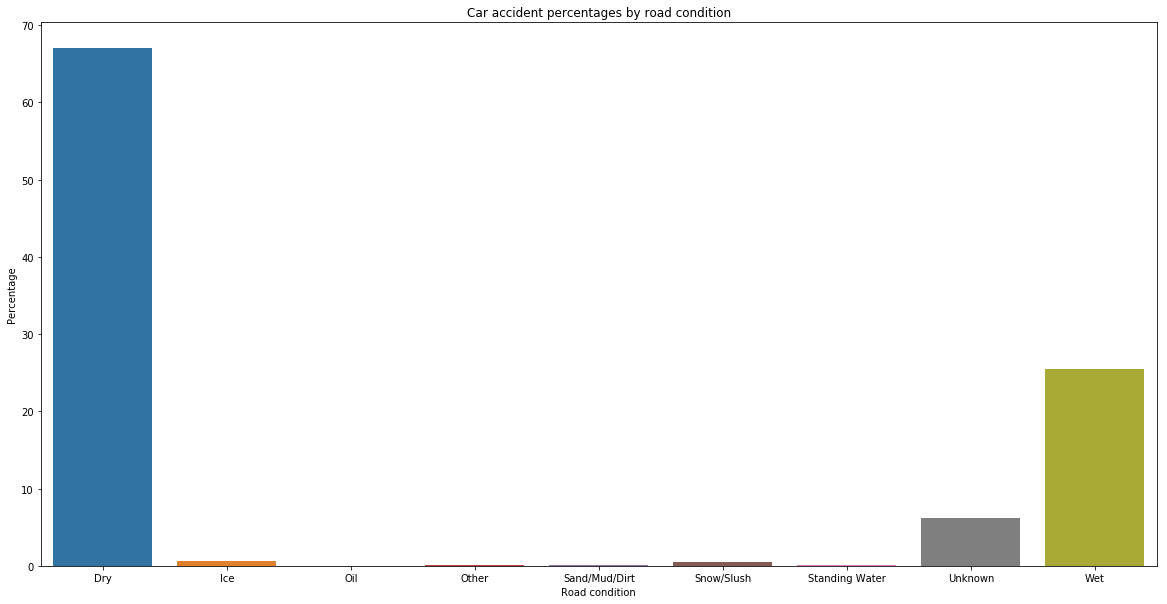

In [84]:
plt.figure(figsize=(20,10))
plt.title("Car accident percentages by road condition")
sns.barplot(x="Road condition", y="Percentage", data=roadcond_count)

In [86]:
severity_roadcond_count = seattle_car_accid_df[['ROADCOND','SEVERITYCODE']]
count = severity_roadcond_count.groupby(['ROADCOND','SEVERITYCODE']).size()
severity_roadcond_count = severity_roadcond_count.groupby(['ROADCOND','SEVERITYCODE']).count()
severity_roadcond_count['Car accidents'] = count
severity_roadcond_count['Percentage'] = severity_roadcond_count['Car accidents'].apply(lambda x: str(round(100 * x / total_rows,2))+"%")
severity_roadcond_count

Car accidents Percentage
ROADCOND       SEVERITYCODE                          
Dry            1                     83442     44.31%
               2                     40310      21.4%
               3                      2219      1.18%
               4                       266      0.14%
Ice            1                       912      0.48%
               2                       269      0.14%
               3                        18      0.01%
               4                         1       0.0%
Oil            1                        36      0.02%
               2                        24      0.01%
Other          1                        82      0.04%
               2                        42      0.02%
               3                         3       0.0%
Sand/Mud/Dirt  1                        47      0.02%
               2                        22      0.01%
Snow/Slush     1                       815      0.43%
               2                       164      0.09%
               3                         8       0.0%
Standing Water 1                        80      0.04%
               2                        29      0.02%
               3                         2       0.0%
Unknown        1                     10834      5.75%
               2                       713      0.38%
               3                        29      0.02%
               4                         1       0.0%
Wet            1                     31355     16.65%
               2                     15780      8.38%
               3                       753       0.4%
               4                        69      0.04%

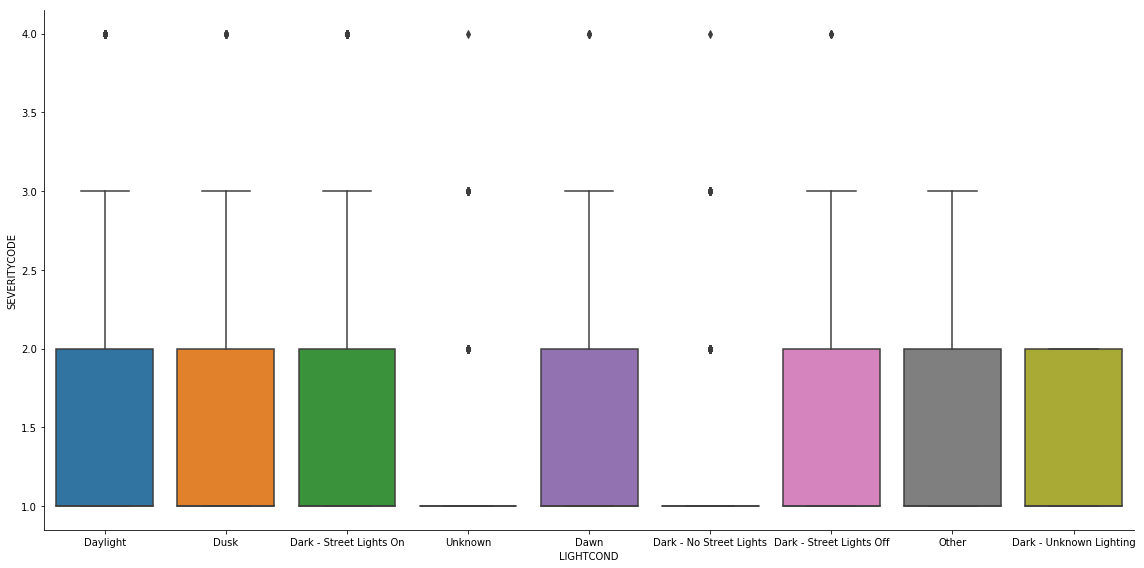

In [87]:
sns.catplot(x="LIGHTCOND", y="SEVERITYCODE", kind="box", data=seattle_car_accid_df, height=8, aspect=2)

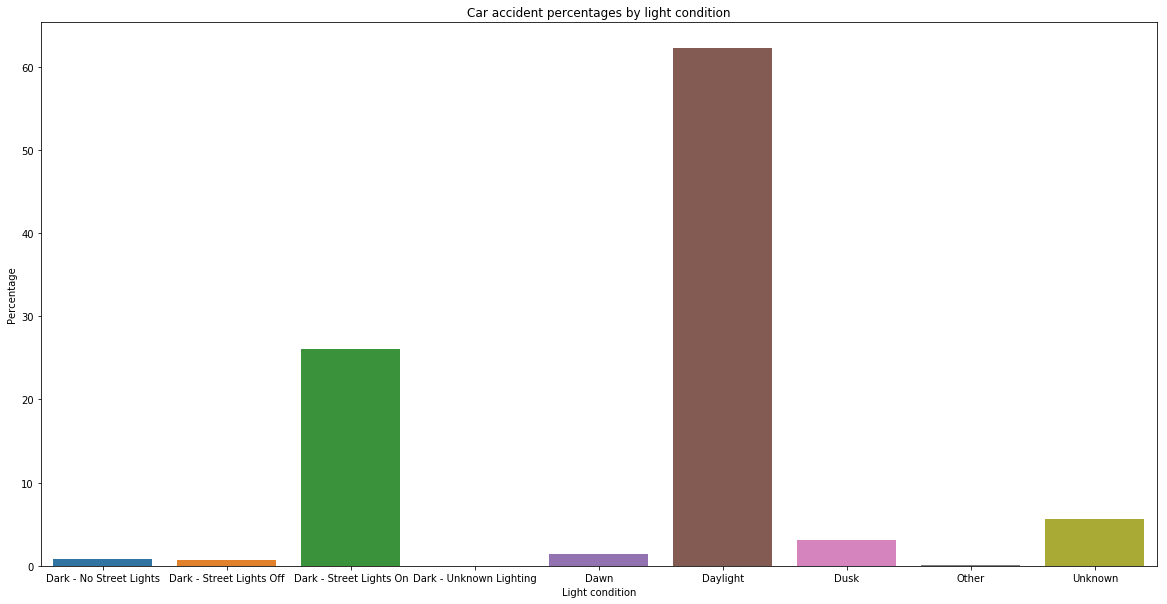

In [88]:
lightcond_count = seattle_car_accid_df[['LIGHTCOND']].rename(columns={'LIGHTCOND':'Light condition'})
lightcond_count = lightcond_count.groupby(['Light condition']).size().reset_index().rename(columns={0:'Car accidents'})
#lightcond_count['percentage'] = lightcond_count['Car accidents'].apply(lambda x: str(round(100 * x / total_rows,2))+"%")
lightcond_count['Percentage'] = lightcond_count['Car accidents'].apply(lambda x: round(100 * x / total_rows,2))
plt.figure(figsize=(20,10))
plt.title("Car accident percentages by light condition")
sns.barplot(x="Light condition", y="Percentage", data=lightcond_count)

In [89]:
severity_lightcond = seattle_car_accid_df[['LIGHTCOND','SEVERITYCODE']]
count = severity_lightcond.groupby(['LIGHTCOND','SEVERITYCODE']).size()
severity_lightcond = severity_lightcond.groupby(['LIGHTCOND','SEVERITYCODE']).count()
severity_lightcond['Car accidents'] = count
severity_lightcond['Percentage'] = severity_lightcond['Car accidents'].apply(lambda x: str(round(100 * x / total_rows,2))+"%")
severity_lightcond

Car accidents Percentage
LIGHTCOND                SEVERITYCODE                          
Dark - No Street Lights  1                      1144      0.61%
                         2                       334      0.18%
                         3                        25      0.01%
                         4                         1       0.0%
Dark - Street Lights Off 1                       851      0.45%
                         2                       314      0.17%
                         3                        28      0.01%
                         4                         4       0.0%
Dark - Street Lights On  1                     33501     17.79%
                         2                     14502       7.7%
                         3                      1007      0.53%
                         4                       145      0.08%
Dark - Unknown Lighting  1                        16      0.01%
                         2                         8       0.0%
Dawn                     1                      1662      0.88%
                         2                       832      0.44%
                         3                        60      0.03%
                         4                         5       0.0%
Daylight                 1                     76487     40.61%
                         2                     38784     20.59%
                         3                      1774      0.94%
                         4                       167      0.09%
Dusk                     1                      3883      2.06%
                         2                      1945      1.03%
                         3                       110      0.06%
                         4                        14      0.01%
Other                    1                       160      0.08%
                         2                        54      0.03%
                         3                         4       0.0%
Unknown                  1                      9899      5.26%
                         2                       580      0.31%
                         3                        24      0.01%
                         4                         1       0.0%

In [91]:
weather_count = seattle_car_accid_df[['WEATHER']].rename(columns={'WEATHER':'Weather'})
weather_count = weather_count.groupby(['Weather']).size().reset_index().rename(columns={0:'Car accidents'})
weather_count['Percentage'] = weather_count['Car accidents'].apply(lambda x: str(round(100 * x / total_rows,2))+"%")
weather_count

,Weather,Car accidents,Percentage
0,Blowing Sand/Dirt,49,0.03%
1,Clear,112681,59.83%
2,Fog/Smog/Smoke,564,0.3%
3,Other,773,0.41%
4,Overcast,28013,14.87%
5,Partly Cloudy,10,0.01%
6,Raining,33525,17.8%
7,Severe Crosswind,26,0.01%
8,Sleet/Hail/Freezing Rain,115,0.06%
9,Snowing,893,0.47%


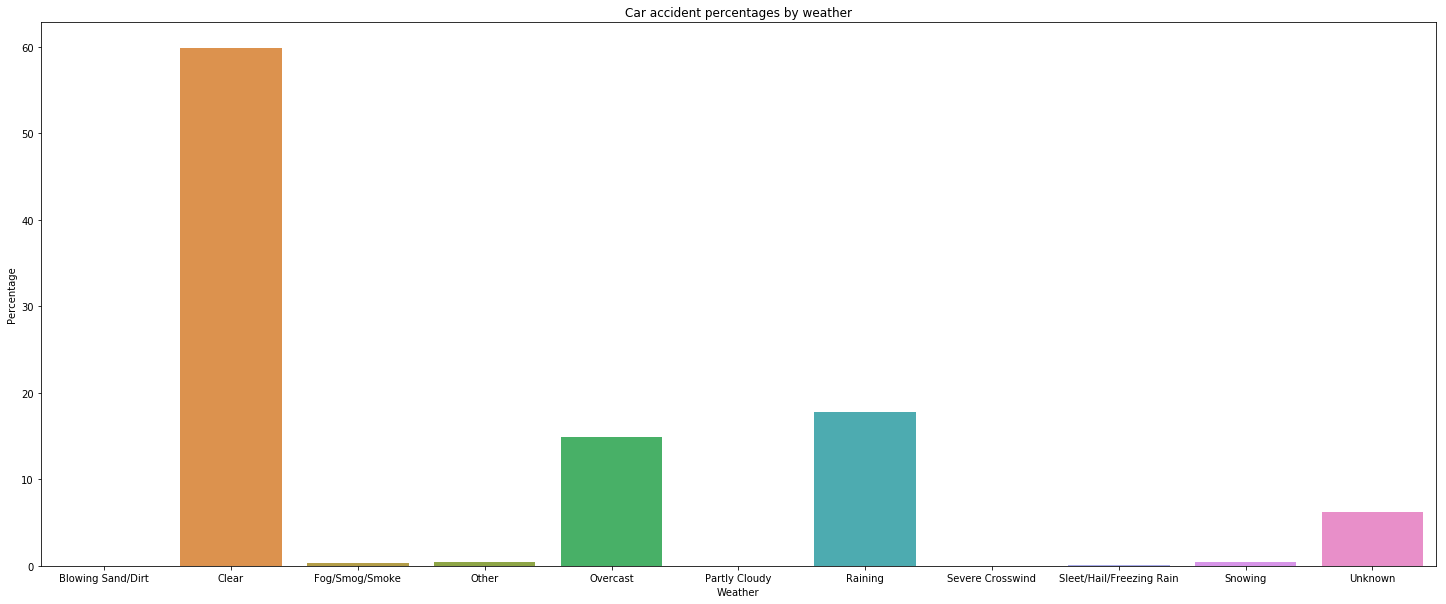

In [92]:
weather_count['Percentage'] = weather_count['Car accidents'].apply(lambda x: round(100 * x / total_rows,2))
plt.figure(figsize=(25,10))
plt.title("Car accident percentages by weather")
sns.barplot(x="Weather", y="Percentage", data=weather_count)

In [93]:
severity_weather = seattle_car_accid_df[['WEATHER','SEVERITYCODE']]
count = severity_weather.groupby(['WEATHER','SEVERITYCODE']).size()
severity_weather = severity_weather.groupby(['WEATHER','SEVERITYCODE']).count()
severity_weather['Car accidents'] = count
severity_weather['Percentage'] = severity_weather['Car accidents'].apply(lambda x: str(round(100 * x / total_rows,2))+"%")
severity_weather

Car accidents Percentage
WEATHER                  SEVERITYCODE                          
Blowing Sand/Dirt        1                        36      0.02%
                         2                        13      0.01%
Clear                    1                     74364     39.49%
                         2                     36087     19.16%
                         3                      2005      1.06%
                         4                       225      0.12%
Fog/Smog/Smoke           1                       371       0.2%
                         2                       187       0.1%
                         3                         3       0.0%
                         4                         3       0.0%
Other                    1                       645      0.34%
                         2                       118      0.06%
                         3                         7       0.0%
                         4                         3       0.0%
Overcast                 1                     18740      9.95%
                         2                      8778      4.66%
                         3                       442      0.23%
                         4                        53      0.03%
Partly Cloudy            1                         5       0.0%
                         2                         4       0.0%
                         4                         1       0.0%
Raining                  1                     21757     11.55%
                         2                     11193      5.94%
                         3                       525      0.28%
                         4                        50      0.03%
Severe Crosswind         1                        18      0.01%
                         2                         7       0.0%
                         4                         1       0.0%
Sleet/Hail/Freezing Rain 1                        85      0.05%
                         2                        28      0.01%
                         3                         2       0.0%
Snowing                  1                       716      0.38%
                         2                       167      0.09%
                         3                        10      0.01%
Unknown                  1                     10866      5.77%
                         2                       771      0.41%
                         3                        38      0.02%
                         4                         1       0.0%

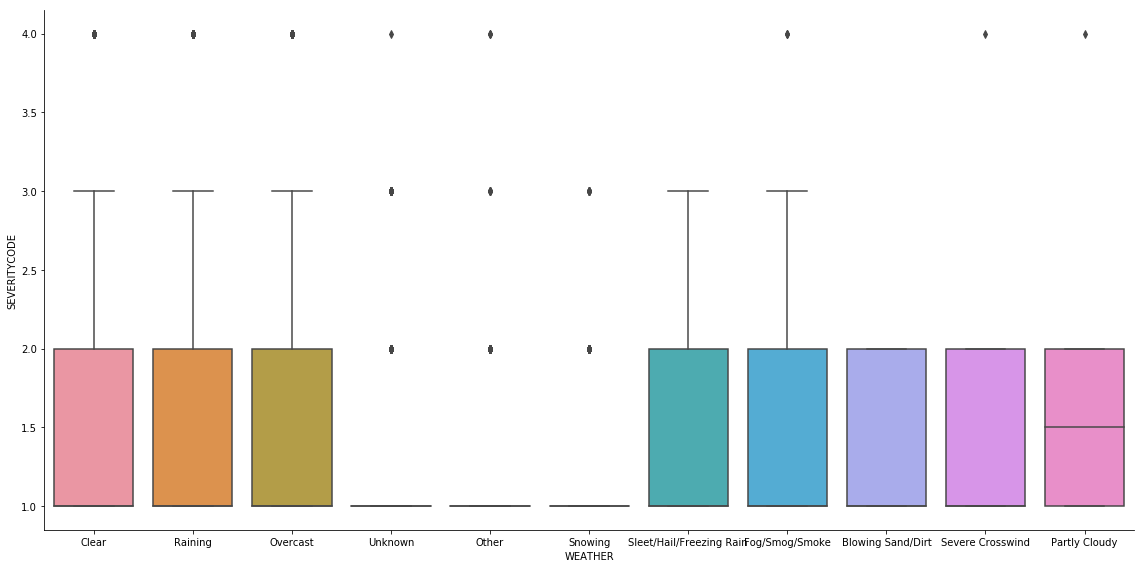

In [94]:
sns.catplot(x="WEATHER", y="SEVERITYCODE", kind="box", data=seattle_car_accid_df, height=8, aspect=2)

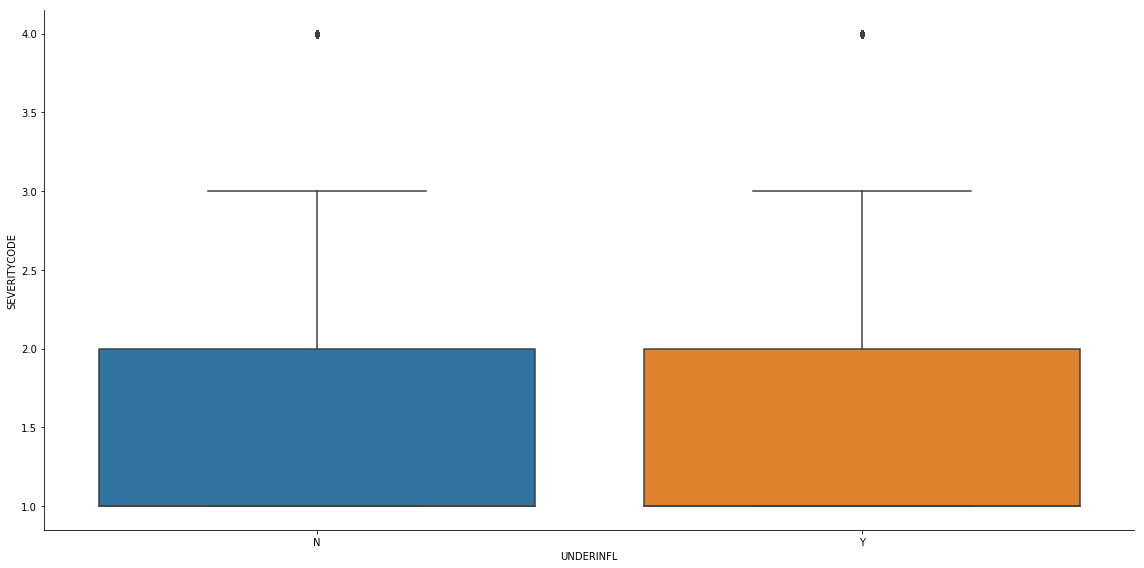

In [95]:
sns.catplot(x="UNDERINFL", y="SEVERITYCODE", kind="box", data=seattle_car_accid_df, height=8, aspect=2)

### Splitting data set into training, development, and test sets (60%, 20%, and 20% respectively)

In [97]:
training_set = df.sample(frac=0.6,random_state=200)
temp = df.drop(training_set.index)
development_set = temp.sample(frac=0.5,random_state=200)
test_set = temp.drop(development_set.index)
print("Training set:",training_set.shape,"\nDevelopment set:",development_set.shape,"\nTest set:",test_set.shape)

Training set: (112995, 13) 
Development set: (37665, 13) 
Test set: (37665, 13)


## Implementing a Randon Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [99]:
# Separate input features (X) and target variable (y) for the training set
y_train = training_set.SEVERITYCODE
X_train = training_set.drop(columns='SEVERITYCODE')
 
# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Separate input features (X) and target variable (y) for the testing set
y_test = development_set.SEVERITYCODE
X_test = development_set.drop(columns='SEVERITYCODE')
 
# Predict on training set
pred_y = clf.predict(X_test)
 
# Is our model still predicting just one class?
print("Predicted classes:",np.unique(pred_y))
 
# How's our accuracy?
print("Accuracy score: {:.2%}".format(accuracy_score(y_test, pred_y)))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted classes: [1 2 3 4]
Accuracy score: 72.45%


In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           1       0.75      0.92      0.82     25473
           2       0.61      0.34      0.44     11505
           3       0.13      0.01      0.03       607
           4       0.00      0.00      0.00        80

   micro avg       0.72      0.72      0.72     37665
   macro avg       0.37      0.32      0.32     37665
weighted avg       0.70      0.72      0.69     37665

Confusion matrix, without normalization
[[23312  2132    24     5]
 [ 7494  3969    37     5]
 [  275   322     9     1]
 [   29    50     1     0]]


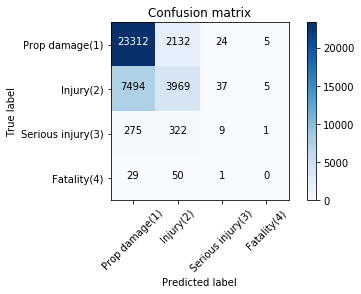

In [102]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_y, labels=[1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_y))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop damage(1)','Injury(2)','Serious injury(3)','Fatality(4)'],normalize= False,  title='Confusion matrix')

## Testing the model with the test set

In [103]:
# Separate input features (X) and target variable (y) for the final testing set
test_y = test_set.SEVERITYCODE
test_X = test_set.drop(columns='SEVERITYCODE')
pred_test_y = clf.predict(test_X)

# Is our model still predicting just one class?
print("Predicted classes:",np.unique(pred_test_y))
 
# How's our accuracy?
print("Accuracy score: {:.2%}".format(accuracy_score(test_y, pred_test_y)))

Predicted classes: [1 2 3 4]
Accuracy score: 72.45%


              precision    recall  f1-score   support

           1       0.75      0.92      0.82     25499
           2       0.61      0.34      0.44     11509
           3       0.11      0.01      0.02       593
           4       0.00      0.00      0.00        64

   micro avg       0.72      0.72      0.72     37665
   macro avg       0.37      0.32      0.32     37665
weighted avg       0.70      0.72      0.69     37665

Confusion matrix, without normalization
[[23349  2130    17     3]
 [ 7534  3932    38     5]
 [  283   303     7     0]
 [   30    34     0     0]]


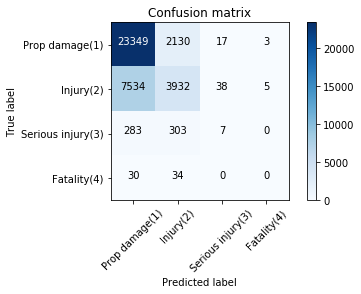

In [104]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, pred_test_y, labels=[1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(test_y, pred_test_y))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop damage(1)','Injury(2)','Serious injury(3)','Fatality(4)'],normalize= False,  title='Confusion matrix')

## Results

Based on the confusion matrix, the model predicted 95.38% of the “property damage” severity car accidents correctly, 28.03% of car accidents were correctly predicted with an “injury” severity. However, the model failed to correctly predict 98.57% of “serious injury” car accidents, and 98.53% of car accidents that ended up with fatalities. Actually, many of the car accidents that had an injury severity were misclassified with a “property damage” severity, which may well be because the model is biased towards the “property damage” severity.

## Conclusion

In this study, I analyzed the relationship between car accident severity and the external conditions in Seattle City roads. The features that were identified as the most important features affecting car accident’s severity are road condition, light condition, weather condition, number of pedestrians involved, and number of pedalcyclists involved. I built a classification model to predict car accident’s severity going from property damages, to fatalities. This model can be very useful in helping governments to reduce car accidents and their severity as it predicts how likely a severe car accident is under specific external conditions and advice drivers to be more careful when those external conditions are present, as well as increasing traffic police controls.